<b> If you are just starting your Data Science journey or would like to learn about some cool 
python libraries for data science, then I recommend you to check out this-
<a href='https://medium.com/swlh/start-your-data-science-journey-today-37366ee463f'> 
</b>

# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml                        # using openml to import dataset 
from pandas_profiling import ProfileReport                       
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer                   # to transform column of different types
from sklearn.model_selection import train_test_split            
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV                # to find best hyper parameters

# import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# To display multiple output from a single cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing TITANIC dataset

TITANIC dataset contains the details of the passengers who were onboard on Titanic ship and whether they survived or not.

In [2]:
# importing TITANIC dataset using openml, more details at- https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

There are many columns which needs proper analysis like Name, ticket. As here the main idea is to just show how we can create data pipeline. We will use the columns which require minimium preprocessing i.e. (Age, Sex, PClass, Fare, Embarked)

In [3]:
# top rows of the dataset
X.head(2)
y.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


0    1
1    1
Name: survived, dtype: category
Categories (2, object): [0, 1]

# Profiling Report using Pandas Profiling

In [4]:
# creating a profile report using pandas profiling
combine_dataset = pd.concat([X, y], axis=1)         # combine dataset to profile it together
profile_report = ProfileReport(combine_dataset)

As we can see from the report, there are missing values for different columns and we need to impute these values based on different strategy. For this demo, we have used SimpleImputer and grid searched for best strategy

In [5]:
profile_report.to_widgets()

In [6]:
# saving profile report
profile_report.to_file('titanic_profiling_report.html')

# Different Operations on Data

In [7]:
# Numerical features in the data
numeric_features = ['age', 'fare']

# categorical features in the data
categorical_features = ['embarked', 'sex', 'pclass']

## Imputing Data

In machine learning, we need to tackle missing values as many models can not handle them. Sklearn provides different strategies, below we will see how we can use SimpleImputer.

In [8]:
# Lets make a copy of X
X_copy = X.copy()

In [9]:
# As we can see from the report, Age and embarked have few missing values. 
# So, we need to impute these values before analyzing

# Lets see how imputer works and then we will see how we can create this using pipeline
# All the missing values will be filled with mean
impute_age = SimpleImputer(strategy='mean')

In [10]:
X_copy['age_imputed'] = impute_age.fit_transform(X[['age']])

In [11]:
# Lets see how missing values are filled
X_copy[X_copy['age'].isna()].head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_imputed
15,1.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.925,None,S,None,NaN,"New York, NY",29.881135
37,1.0,"Bradley, Mr. George ('George Arthur Brayton')",male,NaN,0.0,0.0,111427,26.550,None,S,9,NaN,"Los Angeles, CA",29.881135


In [12]:
# embarked contains string values and hence we can not use mean or median.
# Two strategy which is already defined for string data is constant or most_frequent

# Below we used most_frequent which means the embarked port which had most passengers will be used
impute_embarked = SimpleImputer(strategy='most_frequent')

In [13]:
X_copy['embarked_imputed'] = impute_embarked.fit_transform(X[['embarked']])

In [14]:
# Lets see how missing values are filled

# S is indeed the most frequent port if you see in profile report
X_copy[X_copy['embarked'].isna()].head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_imputed,embarked_imputed
168,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,None,38.0,S
284,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0,S


## Scaling data

Many machine learning models need to have data with in a scale as otherwise they can get affected by different variance of different features. Below we will see how we can apply scaling

In [15]:
# Lets see how scaling can help on 1 column

# this scale will scale the values within the range [0,1]
minmax_scaler = MinMaxScaler()

In [16]:
# we can apply scaler on multiple columns which we do below with the pipeling.
# This is only to show the effect of scaler
X_copy['age_scaled'] = minmax_scaler.fit_transform(X[['age']])

In [17]:
# see the values are scaled between [0,1]
X_copy['age_scaled'].min()
X_copy['age_scaled'].max()

0.0

1.0

## One Hot Encoding

In machine learning, when we have a feature which can have only certain range of values i.e. Embarked feature can have only 3 values, we apply one hot encoding to basically convert each column into a number of columns which is equal to the number of distinct values for the feature

In [18]:
# Lets for example see how applyin One hot encoding on embarked feature works

one_hot_encoder = OneHotEncoder()

In [19]:
# See below three different columns are created
one_hot_encoder.fit_transform(X_copy[['embarked_imputed']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [20]:
# features for each value of embarked
one_hot_encoder.get_feature_names()

array(['x0_C', 'x0_Q', 'x0_S'], dtype=object)

# Building Pipeline

Now, we know what each operation do. We will now see how we can utilize Data pipeline directly to apply all these operations.

Data Pipeline also helps in <b>data leakage problem</b> as while applying various operations we applied it on the entire dataset and hence we had given some visibility into the test dataset. Although, there are other ways to overcome that, we will use data pipelines which is much cleaner approach.

In [21]:
numerical_features = ['age', 'fare']

In [22]:
# Creating a pipeling which can be used on numerical data.

# This is sequential. So, we are first imputing the missing values 
# and then applying MinMaxScaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())])

In [23]:
categorical_features = ['embarked', 'sex', 'pclass']

In [24]:
# Creating a pipeling which can be used on categorical data.

# This is sequential. So, we are first imputing the missing values 
# and then applying OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [25]:
# Scikit learn provides ColumnTransformer which can be used to apply
# different transformer(operations) to different set of columns

# Below we are applying our numerical_transformer and categorical_transform for our
# numerical and categorical features
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

In [26]:
# Lets append classifer to our data transformer

# we are using Logistics Regression here
classifier = Pipeline(steps=[('data_transformer', data_transformer),
                      ('classifier', LogisticRegression(random_state=0, max_iter=10000))])

In [27]:
# We can utilize params grid to check for best hyperparameters

# The syntax here is name__parameters and we need to chain if we have nested pipelines 
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__solver': ['liblinear','newton-cg', 'lbfgs','sag','saga']
}

In [28]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

In [29]:
grid_search = GridSearchCV(classifier, param_grid=param_grid)

In [30]:
grid_search.fit(X_train, y_train);

## Printing Pipeline

With Sklearn 0.23.1, we can even visualize our estimator using the set_config option

In [31]:
from sklearn import set_config

In [32]:
# set config to diagram for visualizing the pipelines
set_config(display='diagram')

In [33]:
# lets see our best estimator
grid_search.best_estimator_

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'fare']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=0,
                                    solver='liblinear'))])

In [34]:
# saving pipeling as html format
from sklearn.utils import estimator_html_repr
with open('titanic_data_pipeline_estimator.html', 'w') as f:  
    f.write(estimator_html_repr(grid_search.best_estimator_))

8307

# Evaluating Model

In [35]:
y_pred = grid_search.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       203
           1       0.77      0.70      0.74       125

    accuracy                           0.81       328
   macro avg       0.80      0.79      0.79       328
weighted avg       0.81      0.81      0.81       328



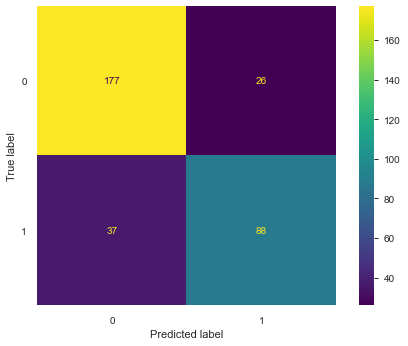

In [37]:
plot_confusion_matrix(grid_search, X_test, y_test)

In [38]:
grid_search.score(X_test, y_test)

0.8079268292682927